# catboost lagged feature

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data_path = "./data/"
df_train = pd.read_csv(data_path + "train.csv")
df_test = pd.read_csv(data_path + "test.csv")

# drop id
#df_train.drop('id', axis=1, inplace=True)

df_train['date'] = pd.to_datetime(df_train['date'])

df_train.head(10)

,id,date,country,store,product,num_sold
0,0,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding,63
1,1,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Train More LLMs,66
2,2,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win Friends and Influence People,9
3,3,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win More Kaggle Competitions,59
4,4,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Write Better,49
5,5,2017-01-01,Argentina,Kaggle Store,Using LLMs to Improve Your Coding,88
6,6,2017-01-01,Argentina,Kaggle Store,Using LLMs to Train More LLMs,98
7,7,2017-01-01,Argentina,Kaggle Store,Using LLMs to Win Friends and Influence People,14
8,8,2017-01-01,Argentina,Kaggle Store,Using LLMs to Win More Kaggle Competitions,83
9,9,2017-01-01,Argentina,Kaggle Store,Using LLMs to Write Better,69


In [2]:
# split date into year, month, day
df_train['year'] = df_train['date'].dt.year
df_train['month'] = df_train['date'].dt.month
df_train['day'] = df_train['date'].dt.day


df_train_0 = df_train
# drop date
#df_train_0 = df_train.drop('date', axis=1)

# one-hot encoding of 'country', 'store', 'product' columns
#df_train = pd.get_dummies(df_train, columns=['country', 'store', 'product'])


df_train_0['country'] = df_train_0['country'].astype('category')
df_train_0['store'] = df_train_0['store'].astype('category')
df_train_0['product'] = df_train_0['product'].astype('category')

df_train_0.head(10)

,id,date,country,store,product,num_sold,year,month,day
0,0,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding,63,2017,1,1
1,1,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Train More LLMs,66,2017,1,1
2,2,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win Friends and Influence People,9,2017,1,1
3,3,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win More Kaggle Competitions,59,2017,1,1
4,4,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Write Better,49,2017,1,1
5,5,2017-01-01,Argentina,Kaggle Store,Using LLMs to Improve Your Coding,88,2017,1,1
6,6,2017-01-01,Argentina,Kaggle Store,Using LLMs to Train More LLMs,98,2017,1,1
7,7,2017-01-01,Argentina,Kaggle Store,Using LLMs to Win Friends and Influence People,14,2017,1,1
8,8,2017-01-01,Argentina,Kaggle Store,Using LLMs to Win More Kaggle Competitions,83,2017,1,1
9,9,2017-01-01,Argentina,Kaggle Store,Using LLMs to Write Better,69,2017,1,1


### feature engineering - lagged feature

In [3]:
# create a new column - "num_sold_last_day" - which is the num_sold of the same product, in the same country and store, but in the previous day


for t in []:
    print("Calculating lagged feature for t = ", t)
    col_name = f'num_sold_t- {t}'
    df_train_0[col_name] = df_train_0.groupby(['country', 'store', 'product'])['num_sold'].shift(t)
    df_train_0[col_name] = df_train_0[col_name].fillna(0)
    df_train_0[col_name] = df_train_0[col_name].astype('int32')


country = "Canada"
store = "Kagglazon"
product = "Using LLMs to Train More LLMs"

df_train_0[(df_train_0['country'] == country) & (df_train_0['store'] == store) & (df_train_0['product'] == product)].head(10)

,id,date,country,store,product,num_sold,year,month,day
26,26,2017-01-01,Canada,Kagglazon,Using LLMs to Train More LLMs,1101,2017,1,1
101,101,2017-01-02,Canada,Kagglazon,Using LLMs to Train More LLMs,930,2017,1,2
176,176,2017-01-03,Canada,Kagglazon,Using LLMs to Train More LLMs,967,2017,1,3
251,251,2017-01-04,Canada,Kagglazon,Using LLMs to Train More LLMs,895,2017,1,4
326,326,2017-01-05,Canada,Kagglazon,Using LLMs to Train More LLMs,817,2017,1,5
401,401,2017-01-06,Canada,Kagglazon,Using LLMs to Train More LLMs,755,2017,1,6
476,476,2017-01-07,Canada,Kagglazon,Using LLMs to Train More LLMs,850,2017,1,7
551,551,2017-01-08,Canada,Kagglazon,Using LLMs to Train More LLMs,796,2017,1,8
626,626,2017-01-09,Canada,Kagglazon,Using LLMs to Train More LLMs,687,2017,1,9
701,701,2017-01-10,Canada,Kagglazon,Using LLMs to Train More LLMs,635,2017,1,10


# feature engineering - weekend


In [6]:
df_train_0['weekday'] = df_train_0['date'].dt.weekday

weekend_days = [4, 5, 6] # friday, saturday, sunday
df_train_0['is_weekend'] = df_train_0['weekday'].apply(lambda x: 1 if x in weekend_days else 0)


# is_holiday
# 28th Dec to 1st Jan
# 5 & 6th Jan
# 5th May
# 26th of 11th month
# 29th of 11th month
# between 2017 and 2023
holiday_list = [
    '2017-12-28', '2017-12-29', '2017-12-30', '2017-12-31', '2018-01-01',
    '2018-01-05', '2018-01-06', '2018-05-05', '2018-11-26', '2018-11-29',
    '2019-12-28', '2019-12-29', '2019-12-30', '2019-12-31', '2020-01-01',
    '2020-01-05', '2020-01-06', '2020-05-05', '2020-11-26', '2020-11-29',
    '2021-12-28', '2021-12-29', '2021-12-30', '2021-12-31', '2022-01-01',
    '2022-01-05', '2022-01-06', '2022-05-05', '2022-11-26', '2022-11-29',
    '2023-12-28', '2023-12-29', '2023-12-30', '2023-12-31', '2024-01-01',
    '2024-01-05', '2024-01-06', '2024-05-05', '2024-11-26', '2024-11-29'
]

holiday_list = pd.to_datetime(holiday_list)

df_train_0['is_holiday'] = df_train_0['date'].apply(lambda x: 1 if x in holiday_list else 0)

In [7]:
df_train_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136950 entries, 0 to 136949
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id          136950 non-null  int64         
 1   date        136950 non-null  datetime64[ns]
 2   country     136950 non-null  category      
 3   store       136950 non-null  category      
 4   product     136950 non-null  category      
 5   num_sold    136950 non-null  int64         
 6   year        136950 non-null  int32         
 7   month       136950 non-null  int32         
 8   day         136950 non-null  int32         
 9   weekday     136950 non-null  int32         
 10  is_weekend  136950 non-null  int64         
 11  is_holiday  136950 non-null  int64         
dtypes: category(3), datetime64[ns](1), int32(4), int64(4)
memory usage: 7.7 MB


In [9]:
df_train_0.head()

,id,date,country,store,product,num_sold,year,month,day,weekday,is_weekend,is_holiday
0,0,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding,63,2017,1,1,6,1,0
1,1,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Train More LLMs,66,2017,1,1,6,1,0
2,2,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win Friends and Influence People,9,2017,1,1,6,1,0
3,3,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Win More Kaggle Competitions,59,2017,1,1,6,1,0
4,4,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Write Better,49,2017,1,1,6,1,0


### training & evaluation

In [10]:
# split into train and validation
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, median_absolute_error

from catboost import Pool, CatBoostRegressor

results_mse = []
results_mae = []

df_train_0_no_id = df_train_0.drop(['id', 'date'], axis=1)

for train_index, val_index in TimeSeriesSplit(n_splits=5).split(df_train_0_no_id):
    X_train = df_train_0_no_id.iloc[train_index]
    y_train = df_train_0_no_id.iloc[train_index]['num_sold']

    X_val = df_train_0_no_id.iloc[val_index]
    y_val = df_train_0_no_id.iloc[val_index]['num_sold']

    cat_features = [0, 1, 2]
      
    train_pool = Pool(X_train, y_train, cat_features=cat_features)
    val_pool = Pool(X_val, cat_features=cat_features)

    model = CatBoostRegressor(random_state=42, objective='MAE', task_type='GPU')
    model.fit(train_pool, early_stopping_rounds=50, silent=False)
    
    # evaluate on validation set
    y_pred = model.predict(val_pool)
    mse = mean_squared_error(y_val, y_pred)
    mae = median_absolute_error(y_val, y_pred)
    
    results_mse.append("%.2f" % mse)
    results_mae.append("%.2f" % mae)
    del model

print(f"Mean squared error for each split: | {' | '.join(results_mse)} |")
print(f"Median absolute error for each split: | {' | '.join(results_mae)} |")

Default metric period is 5 because MAE is/are not implemented for GPU


0:	learn: 112.4392662	total: 14.4ms	remaining: 14.4s
1:	total: 38.4ms	remaining: 19.2s
2:	total: 68.8ms	remaining: 22.9s
3:	total: 87.8ms	remaining: 21.9s
4:	total: 133ms	remaining: 26.4s
5:	learn: 112.3647207	total: 160ms	remaining: 26.4s
6:	total: 178ms	remaining: 25.3s
7:	total: 193ms	remaining: 24s
8:	total: 208ms	remaining: 22.9s
9:	total: 224ms	remaining: 22.2s
10:	learn: 112.2903395	total: 238ms	remaining: 21.4s
11:	total: 258ms	remaining: 21.2s
12:	total: 294ms	remaining: 22.4s
13:	total: 324ms	remaining: 22.9s
14:	total: 355ms	remaining: 23.3s
15:	learn: 112.2157612	total: 393ms	remaining: 24.1s
16:	total: 428ms	remaining: 24.7s
17:	total: 450ms	remaining: 24.5s
18:	total: 487ms	remaining: 25.2s
19:	total: 523ms	remaining: 25.6s
20:	learn: 112.1413801	total: 559ms	remaining: 26.1s
21:	total: 594ms	remaining: 26.4s
22:	total: 627ms	remaining: 26.7s
23:	total: 676ms	remaining: 27.5s
24:	total: 712ms	remaining: 27.8s
25:	learn: 112.0668456	total: 749ms	remaining: 28s
26:	total: 7

Default metric period is 5 because MAE is/are not implemented for GPU


0:	learn: 117.2421030	total: 24.7ms	remaining: 24.7s
1:	total: 49.9ms	remaining: 24.9s
2:	total: 69.8ms	remaining: 23.2s
3:	total: 95.1ms	remaining: 23.7s
4:	total: 115ms	remaining: 22.9s
5:	learn: 117.1679409	total: 139ms	remaining: 23s
6:	total: 165ms	remaining: 23.4s
7:	total: 192ms	remaining: 23.8s
8:	total: 223ms	remaining: 24.5s
9:	total: 247ms	remaining: 24.4s
10:	learn: 117.0937897	total: 271ms	remaining: 24.4s
11:	total: 295ms	remaining: 24.3s
12:	total: 319ms	remaining: 24.2s
13:	total: 339ms	remaining: 23.9s
14:	total: 359ms	remaining: 23.6s
15:	learn: 117.0195947	total: 378ms	remaining: 23.2s
16:	total: 406ms	remaining: 23.5s
17:	total: 433ms	remaining: 23.6s
18:	total: 455ms	remaining: 23.5s
19:	total: 472ms	remaining: 23.1s
20:	learn: 116.9454217	total: 500ms	remaining: 23.3s
21:	total: 528ms	remaining: 23.5s
22:	total: 555ms	remaining: 23.6s
23:	total: 582ms	remaining: 23.7s
24:	total: 610ms	remaining: 23.8s
25:	learn: 116.8714239	total: 625ms	remaining: 23.4s
26:	total:

Default metric period is 5 because MAE is/are not implemented for GPU


0:	learn: 118.2689595	total: 7.35ms	remaining: 7.34s
1:	total: 18.4ms	remaining: 9.18s
2:	total: 30.3ms	remaining: 10.1s
3:	total: 46.9ms	remaining: 11.7s
4:	total: 63.1ms	remaining: 12.6s
5:	learn: 118.1943337	total: 70.5ms	remaining: 11.7s
6:	total: 87.7ms	remaining: 12.4s
7:	total: 98.3ms	remaining: 12.2s
8:	total: 112ms	remaining: 12.3s
9:	total: 128ms	remaining: 12.7s
10:	learn: 118.1198540	total: 135ms	remaining: 12.2s
11:	total: 146ms	remaining: 12s
12:	total: 163ms	remaining: 12.3s
13:	total: 177ms	remaining: 12.5s
14:	total: 195ms	remaining: 12.8s
15:	learn: 118.0452501	total: 204ms	remaining: 12.6s
16:	total: 215ms	remaining: 12.4s
17:	total: 226ms	remaining: 12.3s
18:	total: 245ms	remaining: 12.6s
19:	total: 258ms	remaining: 12.6s
20:	learn: 117.9707265	total: 268ms	remaining: 12.5s
21:	total: 285ms	remaining: 12.7s
22:	total: 300ms	remaining: 12.7s
23:	total: 316ms	remaining: 12.8s
24:	total: 323ms	remaining: 12.6s
25:	learn: 117.8961738	total: 336ms	remaining: 12.6s
26:	to

Default metric period is 5 because MAE is/are not implemented for GPU


0:	learn: 116.9425849	total: 7.46ms	remaining: 7.45s
1:	total: 20ms	remaining: 9.97s
2:	total: 36.1ms	remaining: 12s
3:	total: 50.9ms	remaining: 12.7s
4:	total: 66.3ms	remaining: 13.2s
5:	learn: 116.8679409	total: 74.2ms	remaining: 12.3s
6:	total: 86.3ms	remaining: 12.2s
7:	total: 95.8ms	remaining: 11.9s
8:	total: 108ms	remaining: 11.9s
9:	total: 123ms	remaining: 12.2s
10:	learn: 116.7934830	total: 133ms	remaining: 11.9s
11:	total: 143ms	remaining: 11.8s
12:	total: 158ms	remaining: 12s
13:	total: 171ms	remaining: 12s
14:	total: 187ms	remaining: 12.3s
15:	learn: 116.7188938	total: 203ms	remaining: 12.5s
16:	total: 210ms	remaining: 12.1s
17:	total: 226ms	remaining: 12.3s
18:	total: 236ms	remaining: 12.2s
19:	total: 252ms	remaining: 12.3s
20:	learn: 116.6444359	total: 269ms	remaining: 12.5s
21:	total: 277ms	remaining: 12.3s
22:	total: 293ms	remaining: 12.4s
23:	total: 303ms	remaining: 12.3s
24:	total: 310ms	remaining: 12.1s
25:	learn: 116.5698357	total: 322ms	remaining: 12.1s
26:	total: 3

Default metric period is 5 because MAE is/are not implemented for GPU


0:	learn: 116.1680613	total: 7.65ms	remaining: 7.64s
1:	total: 19.8ms	remaining: 9.86s
2:	total: 35ms	remaining: 11.6s
3:	total: 50.2ms	remaining: 12.5s
4:	total: 64.9ms	remaining: 12.9s
5:	learn: 116.0933538	total: 71.8ms	remaining: 11.9s
6:	total: 87.5ms	remaining: 12.4s
7:	total: 103ms	remaining: 12.8s
8:	total: 119ms	remaining: 13.1s
9:	total: 134ms	remaining: 13.3s
10:	learn: 116.0188828	total: 145ms	remaining: 13.1s
11:	total: 160ms	remaining: 13.2s
12:	total: 173ms	remaining: 13.1s
13:	total: 190ms	remaining: 13.4s
14:	total: 207ms	remaining: 13.6s
15:	learn: 115.9443505	total: 216ms	remaining: 13.3s
16:	total: 234ms	remaining: 13.5s
17:	total: 245ms	remaining: 13.4s
18:	total: 263ms	remaining: 13.6s
19:	total: 281ms	remaining: 13.8s
20:	learn: 115.8698532	total: 289ms	remaining: 13.5s
21:	total: 306ms	remaining: 13.6s
22:	total: 318ms	remaining: 13.5s
23:	total: 325ms	remaining: 13.2s
24:	total: 339ms	remaining: 13.2s
25:	learn: 115.7953384	total: 356ms	remaining: 13.3s
26:	tot

In [ ]:
# train on full data
X_train = df_train_0_no_id.drop('num_sold', axis=1)
y_train = df_train_0_no_id['num_sold']

train_pool = Pool(X_train, y_train, cat_features=cat_features)

model = CatBoostRegressor(silent=True, random_state=42, objective='MAE')
model.fit(train_pool)

C:\Users\Wiktor\AppData\Local\Temp\ipykernel_7820\2450452641.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_val['date'] = pd.to_datetime(X_val['year'].astype(str) + '-' + X_val['month'].astype(str) + '-' + X_val['day'].astype(str))
C:\Users\Wiktor\AppData\Local\Temp\ipykernel_7820\2450452641.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_val.sort_values(by='date', inplace=True)


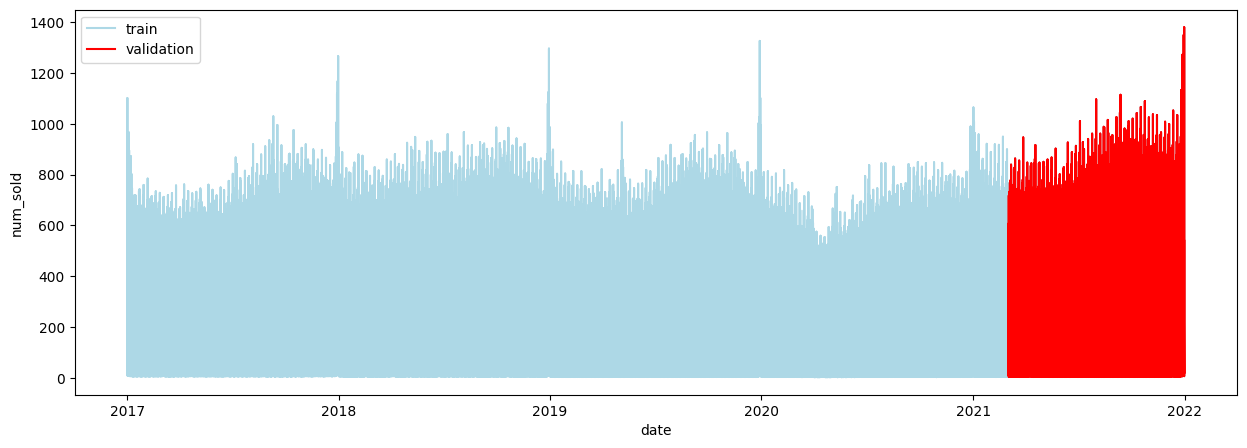

In [ ]:
X_train['date'] = pd.to_datetime(X_train['year'].astype(str) + '-' + X_train['month'].astype(str) + '-' + X_train['day'].astype(str))
X_val['date'] = pd.to_datetime(X_val['year'].astype(str) + '-' + X_val['month'].astype(str) + '-' + X_val['day'].astype(str))

# sort by date
X_train.sort_values(by='date', inplace=True)
X_val.sort_values(by='date', inplace=True)

# plot 'num_sold' vs 'date'
fig, ax = plt.subplots(figsize=(15, 5))

ax.plot(X_train['date'], y_train, label='train', color='lightblue')
ax.plot(X_val['date'], y_val, label='validation', color='red')

ax.set_xlabel('date')
ax.set_ylabel('num_sold')

ax.legend()
plt.show()

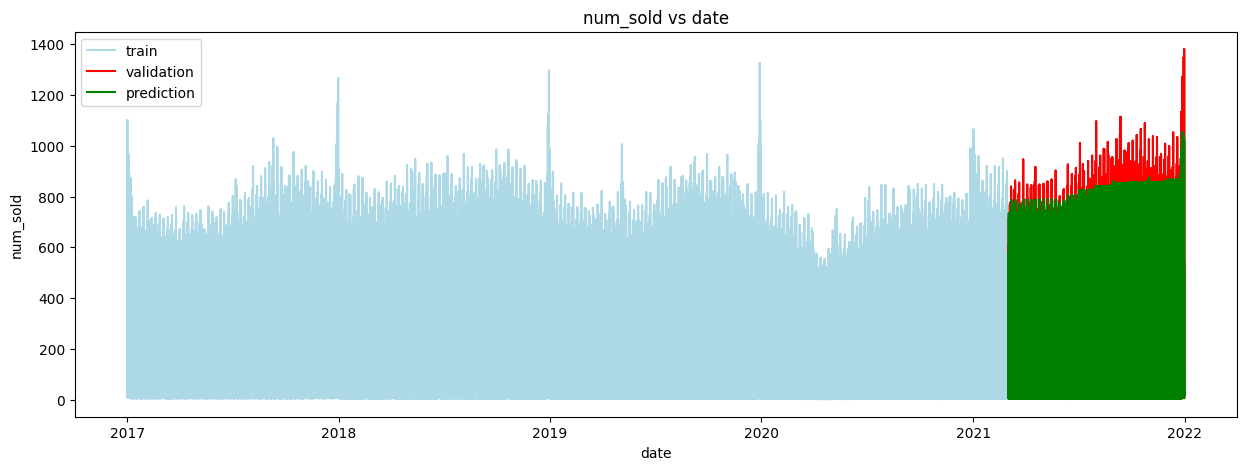

In [ ]:
y_pred = model.predict(X_val)

# plot 'num_sold' vs 'date' - train, validation and predicted
fig, ax = plt.subplots(figsize=(15, 5))

ax.plot(X_train['date'], y_train, label='train', color='lightblue')
ax.plot(X_val['date'], y_val, label='validation', color='red')
ax.plot(X_val['date'], y_pred, label='prediction', color='green')

ax.set_title('num_sold vs date')
ax.set_xlabel('date')
ax.set_ylabel('num_sold')
ax.legend(loc='upper left')

plt.show()

In [ ]:
df_val['prediction'] = model.predict(df_val[['year', 'month', 'day', 'country', 'store', 'product']])
df_val['prediction'] = df_val['prediction'].astype(int)
df_val

NameError: name 'df_val' is not defined

In [ ]:
# test 

df_test = pd.read_csv(data_path + "test.csv")
df_test_0 = df_test.drop('id', axis=1)
df_test_0['date'] = pd.to_datetime(df_test_0['date'])

df_test_0['year'] = df_test_0['date'].dt.year
df_test_0['month'] = df_test_0['date'].dt.month
df_test_0['day'] = df_test_0['date'].dt.day


df_test_0['country'] = df_test_0['country'].astype('category')
df_test_0['store'] = df_test_0['store'].astype('category')
df_test_0['product'] = df_test_0['product'].astype('category')

# predict for test set

df_test_0['prediction'] = model.predict(df_test_0[['year', 'month', 'day', 'country', 'store', 'product']])
df_test_0['prediction'] = df_test_0['prediction'].astype(int)
df_test_0

CatBoostError: features data: pandas.DataFrame column 'country' has dtype 'category' but is not in  cat_features list

In [ ]:
# join df_test with df_test_0 on date, country, store and product

df_test_0['date'] = df_test_0['date'].astype(str)
df_test['date'] = df_test['date'].astype(str)

df_test_1 = pd.merge(df_test, df_test_0, on=['date', 'country', 'store', 'product'], how='outer')
df_test_1

In [ ]:
df_test_1['num_sold'] = df_test_1['prediction']
df_test_1[['id', 'num_sold']].to_csv('second_submission.csv', index=False)